## Generating a Waveform


In [14]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
"""
Created on Thu Nov  8 20:13:55 2018

@author: gravwaves
"""

# Import GW_Template
import GW_CCSNeFromCatalog


# Choose a template
TemplateName = 'And1' # ('And1','Dim1','Ott1','Yak1')

# Read and plot raw template
t,hp,hc,h = GW_CCSNeFromCatalog.Read(TemplateName,0)


# Define a sampling frequency
fs = 4096 # Sampling frequency

# Resampling template and convert oy PyCBC time series
# template          = GW_Template.Read(TemplateName,fs,1)

Template:    Andresen18/And1


## Antenna Patterns and Projecting a Signal into the Detector Frame
(Equations taken from: Arnaud et. al. (2002), "Detection in coincidence of gravitational wave bursts with a network
of interferometric detectors: Geometric acceptance and timing", PHYSICAL REVIEW D, VOLUME 65, 042004 )

In [15]:
from pycbc.detector import Detector
from pycbc.waveform import get_td_waveform
import pylab
import numpy as np

In [22]:
def antenna_pattern_functions(ra, dec, pol, UTC, longitude, latitude, xi, gamma):

    #Time constant
    kappa = 1.0027379*15*np.pi/180

    #Greenwich Mean Sidereal Time at 0 UTC
    #(taken from http://dc.zah.uni-heidelberg.de/apfs/times/q/form)
    #GMST_0 = 21:30:26.0638
    GMST_0 = 21 + 30/60 + 26.0638/3600

    #Local Hour Angle of the source
    LHA = kappa*UTC - (ra + longitude) + GMST_0


    a = (-(1./16.)*np.sin(2*gamma)*(3-np.cos(2*latitude))*np.cos(2*LHA)
    -(1./4.)*np.cos(2*gamma)*np.sin(latitude)*(3-np.cos(2*dec))*np.sin(2*LHA)
    -(1./4.)*np.sin(2*gamma)*np.sin(2*latitude)*np.sin(2*dec)*np.cos(LHA)
    -(1./2.)*np.cos(2*gamma)*np.cos(latitude)*np.sin(LHA)
    -(3./4.)*np.cos(2*gamma)*np.cos(latitude)**2*np.cos(dec)**2
    )

    b = (-np.cos(2*gamma)*np.sin(latitude)*np.sin(dec)*np.cos(2*LHA)
    +(1./4.)*np.sin(2*gamma)*(3-np.cos(2*latitude))*np.sin(dec)*np.sin(2*LHA)
    -np.cos(2*gamma)*np.cos(latitude)*np.cos(dec)*np.cos(LHA)
    +(1./2.)*np.sin(2*gamma)*np.sin(2*latitude)*np.cos(dec)*np.sin(LHA) 
    )
    
    # Calculating the fp and fc antenna pattern weights.
    fp = np.sin(xi)*(a*np.cos(2*pol) + b*np.sin(2*pol))
    fc = np.sin(xi)*(-a*np.sin(2*pol) + b*np.cos(2*pol))

    return fp, fc

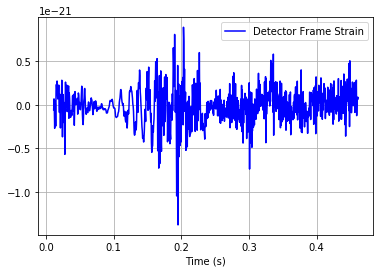

In [25]:
#Source properties (SN 2017gax)
ra = 71.45625*np.pi/180        #Right Ascension
dec = -59.245139*np.pi/180     #Declination
pol = 0.2                      #Polarization (Unknown for SN2017gax)
GPSt = 1186765524              #GPS time (calculated for 2017-08-14 17:05:16 UTC)
UTC = 17 + 5/60 + 16/3600      #Universal Time Coordinate (17:05:16 H)

#Detector properties (H1)
longitude = 119.4*np.pi/180    #Longitude of the detector
latitude = 46.5*np.pi/180      #Latitude of the detector
xi = np.pi/2                   #Detector's arms apperture
gamma = 261.8                  #Orientation angle of the detector

#Calculating the Antenna Pattern Functions (APF)
fp, fc = antenna_pattern_functions(ra, dec, pol, UTC, longitude, latitude, xi, gamma)
# These factors allow us to project a signal into what the detector would
# observe

# Apply the factors to get the detector frame strain
ht = fp * hp + fc * hc


# Zoom in near the merger time
#pylab.plot(t, hp, label='Plus Polarization', color='m' )
#pylab.plot(t, hc, label='Cross Polarization', color='c' )
pylab.plot(t, ht, label='Detector Frame Strain', color='b' )
pylab.xlabel('Time (s)')
pylab.legend()
pylab.grid()
pylab.show()

## Projecting a waveform into multiple detectors

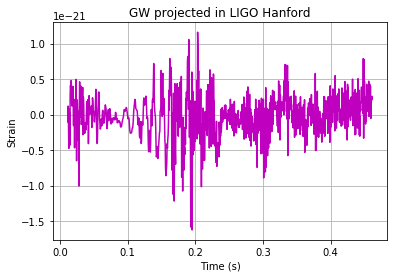

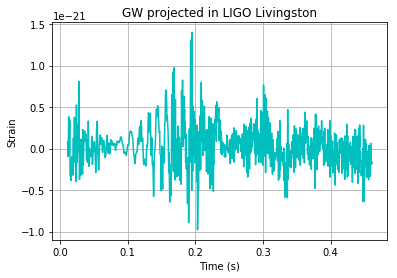

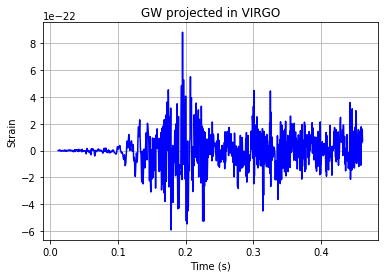

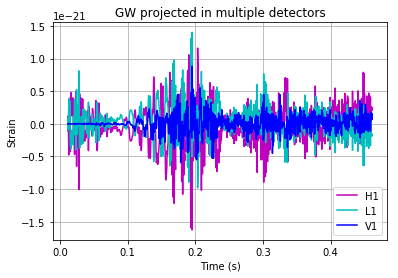

In [33]:
#Detector properties (H1)
longitude_H1 = 119.4*np.pi/180    #Longitude of the detector
latitude_H1 = 46.5*np.pi/180      #Latitude of the detector
xi_H1 = np.pi/2                   #Detector's arms apperture
gamma_H1 = 261.8*np.pi/180        #Orientation angle of the detector

#Detector properties (L1)
longitude_L1 = 90.8*np.pi/180    #Longitude of the detector
latitude_L1 = 30.6*np.pi/180     #Latitude of the detector
xi_L1 = np.pi/2                  #Detector's arms apperture
gamma_L1 = 333*np.pi/180         #Orientation angle of the detector

#Detector properties (V1)
longitude_V1 = -10.5*np.pi/180    #Longitude of the detector
latitude_V1 = 43.6*np.pi/180      #Latitude of the detector
xi_V1 = np.pi/2                   #Detector's arms apperture
gamma_V1 = 206.5*np.pi/180        #Orientation angle of the detector



#Calculating the Antenna Pattern Functions (APF) for H1
fp_H1, fc_H1 = antenna_pattern_functions(ra, dec, pol, UTC,longitude_H1,latitude_H1,xi_H1,gamma_H1)

#Calculating the Antenna Pattern Functions (APF) for L1
fp_L1, fc_L1 = antenna_pattern_functions(ra, dec, pol, UTC,longitude_L1,latitude_L1,xi_L1,gamma_L1)

#Calculating the Antenna Pattern Functions (APF) for V1
fp_V1, fc_V1 = antenna_pattern_functions(ra, dec, pol, UTC,longitude_V1,latitude_V1,xi_V1,gamma_V1)



# Apply the factors to get the detector frame strain for H1
ht_H1 = fp_H1 * hp + fc_H1 * hc

# Apply the factors to get the detector frame strain for L1
ht_L1 = fp_L1 * hp + fc_L1 * hc

# Apply the factors to get the detector frame strain for V1
ht_V1 = fp_V1 * hp + fc_V1 * hc


pylab.figure(1)
pylab.plot(t, ht_H1, label='H1', color='m')
pylab.title("GW projected in LIGO Hanford")
pylab.ylabel('Strain')
pylab.xlabel('Time (s)')
pylab.grid()
pylab.show()

pylab.figure(2)
pylab.plot(t, ht_L1, label='L1', color='c')
pylab.title("GW projected in LIGO Livingston")
pylab.ylabel('Strain')
pylab.xlabel('Time (s)')
pylab.grid()
pylab.show()

pylab.figure(3)
pylab.plot(t, ht_V1, label='V1', color='b')
pylab.title("GW projected in VIRGO")
pylab.ylabel('Strain')
pylab.xlabel('Time (s)')
pylab.grid()
pylab.show()

pylab.figure(4)
# All detectors in a single graph
pylab.plot(t, ht_H1, label='H1', color='m')
pylab.plot(t, ht_L1, label='L1', color='c')
pylab.plot(t, ht_V1, label='V1', color='b')
pylab.title("GW projected in multiple detectors")
pylab.ylabel('Strain')
pylab.xlabel('Time (s)')
pylab.grid()
pylab.legend()
pylab.show()

## Time source gravitational-wave passes through detector

In [30]:

# The source of the gravitational waves
right_ascension = 71.45625*np.pi/180
declination = -59.245139*np.pi/180

# Time in GPS seconds that the GW passes
# (calculated for 2017-08-14 17:05:16 UTC)
time = 1186765524   

# Reference location will be the Hanford detector
# see the `time_delay_from_earth_center` method to use use geocentric time
# as the reference
dref = Detector("H1")

# Time that the GW will (or has) passed through the given detector
for ifo in ["H1", "L1", "V1"]:
    d = Detector(ifo)
    dt = d.time_delay_from_detector(dref, right_ascension, declination, time)
    st = "GW passed through {} {} seconds relative to passing by Hanford"
    print(st.format(ifo, dt))

GW passed through H1 0.0 seconds relative to passing by Hanford
GW passed through L1 -0.00241733294694 seconds relative to passing by Hanford
GW passed through V1 0.0132938702676 seconds relative to passing by Hanford
